In [9]:
#installing & importing modules and packages
%pip install --upgrade pip
%pip install pandas numpy openpyxl seaborn matplotlib

import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

#loading training and testing dataset
train_data = pd.read_excel("TEAM15_DATASET2(TRAIN).xlsx")
test_data = pd.read_excel("TEAM15_DATASET2(TEST).xlsx")

#saving 'price' column in a variable
y = train_data['Price']

# Create price categories
# You can adjust these thresholds based on the distribution of your prices
price_bins = [0, 6000, 12000, float('inf')]
price_labels = ['Low', 'Medium', 'High']
y_class = pd.cut(y, bins=price_bins, labels=price_labels, right=False)

# Display the new categorical target
print(y_class.value_counts())

#removing price column
train_data = train_data.drop('Price', axis=1)

#flagging to differentiate tran and test dataset
train_data['is_train'] = 1
test_data['is_train'] = 0

#merging both training and testing dataset
df = pd.concat([train_data, test_data], ignore_index=True)

print(f"Combined dataset shape: {df.shape}")
print(f"Training samples: {df['is_train'].sum()}")
print(f"Test samples: {(df['is_train'] == 0).sum()}")
print("\nFirst few rows of combined dataset:")
df.head()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Price
Medium    4620
Low       3167
High      2896
Name: count, dtype: int64
Combined dataset shape: (13354, 11)
Training samples: 10683
Test samples: 2671

First few rows of combined dataset:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,is_train
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1


In [10]:
#before preprocessing
df.shape

(13354, 11)

In [11]:
#removing 'Route' column
df.drop('Route', axis=1, inplace=True)

In [12]:
##checking for null values
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
is_train           0
dtype: int64

In [13]:
#accessing row with null value
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,is_train
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,No info,1


In [14]:

df.shape

(13354, 10)

In [15]:
#getting count of variuos data in 'additional info'
df['Additional_Info'].value_counts()

Additional_Info
No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

In [16]:
#dividing it to two categories
df['Additional_Info'] = df['Additional_Info'].apply(lambda x: 'No info' if x == 'No info' else 'Others')
df['Additional_Info'].value_counts()


Additional_Info
No info    10493
Others      2861
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Dep_Time         13354 non-null  object
 5   Arrival_Time     13354 non-null  object
 6   Duration         13354 non-null  object
 7   Total_Stops      13353 non-null  object
 8   Additional_Info  13354 non-null  object
 9   is_train         13354 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.0+ MB


In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,is_train
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,1
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,1
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,1


In [19]:
#feature engineering 
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,is_train,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1,24,03,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,1,1,05,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,1,9,06,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,1,12,05,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,1,01,03,2019


In [20]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1]
df.drop('Dep_Time', axis=1, inplace=True)

df['Arrival_hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minute'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time', axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,is_train,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,1,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,1,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,1,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,1,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,1,01,03,2019,16,50,21,35


In [21]:
#splitting duration to hours and minutes
def extract_duration_hours(duration_str):
    try:
        if 'h' in duration_str:
            return int(duration_str.split('h')[0])
        else:
            return 0
    except:
        return 0

def extract_duration_minutes(duration_str):
    try:
        if 'm' in duration_str:
            parts = duration_str.split(' ')
            for part in parts:
                if 'm' in part:
                    return int(part.replace('m', ''))
            return 0
        else:
            return 0
    except:
        return 0

# Apply the functions
df['Duration_hour'] = df['Duration'].apply(extract_duration_hours)
df['Duration_minute'] = df['Duration'].apply(extract_duration_minutes)
df.drop('Duration', axis=1, inplace=True)

#converting hours to minutes to redcue the features
df['Duration_minutes'] = df['Duration_hour']*60 + df['Duration_minute']
df.drop(['Duration_hour','Duration_minute'], axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,is_train,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,1,24,03,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,1,1,05,2019,05,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,1,9,06,2019,09,25,04,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,1,12,05,2019,18,05,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,1,01,03,2019,16,50,21,35,285


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13354 non-null  object
 1   Source            13354 non-null  object
 2   Destination       13354 non-null  object
 3   Total_Stops       13353 non-null  object
 4   Additional_Info   13354 non-null  object
 5   is_train          13354 non-null  int64 
 6   Date              13354 non-null  object
 7   Month             13354 non-null  object
 8   Year              13354 non-null  object
 9   Dep_hour          13354 non-null  object
 10  Dep_minute        13354 non-null  object
 11  Arrival_hour      13354 non-null  object
 12  Arrival_minute    13354 non-null  object
 13  Duration_minutes  13354 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.4+ MB


In [23]:
df[['Date','Month','Year','Dep_hour','Dep_minute','Arrival_hour','Arrival_minute','Duration_minutes']].isnull().sum()

Date                0
Month               0
Year                0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_minutes    0
dtype: int64

In [24]:
#converting to int datatype
col_to_convert = ['Date','Month','Year','Dep_hour','Dep_minute','Arrival_hour','Arrival_minute']
df[col_to_convert] = df[col_to_convert].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13354 non-null  object
 1   Source            13354 non-null  object
 2   Destination       13354 non-null  object
 3   Total_Stops       13353 non-null  object
 4   Additional_Info   13354 non-null  object
 5   is_train          13354 non-null  int64 
 6   Date              13354 non-null  int64 
 7   Month             13354 non-null  int64 
 8   Year              13354 non-null  int64 
 9   Dep_hour          13354 non-null  int64 
 10  Dep_minute        13354 non-null  int64 
 11  Arrival_hour      13354 non-null  int64 
 12  Arrival_minute    13354 non-null  int64 
 13  Duration_minutes  13354 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.4+ MB


In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,is_train,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,1,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,1,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,1,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,1,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,1,1,3,2019,16,50,21,35,285


In [26]:
#accessing unique values in total_stops column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
#converting text data to numerical values
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,is_train,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,No info,1,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2.0,No info,1,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2.0,No info,1,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,1,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1.0,No info,1,1,3,2019,16,50,21,35,285


In [28]:
#filling null values with mode
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

C:\Users\jishn\AppData\Local\Temp\ipykernel_764\3100553634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)


In [29]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
is_train            0
Date                0
Month               0
Year                0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_minutes    0
dtype: int64

In [30]:
#printing unique values for the columns 
print(df['Airline'].unique(),df['Source'].unique(),df['Destination'].unique())


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [31]:
#encoding categorical columns
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

cols_to_encode = ['Airline', 'Source', 'Destination']

ohe = OneHotEncoder(sparse_output=False, drop=None)
encoded = ohe.fit_transform(df[cols_to_encode])
encoded_cols = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
df = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)

df.head()

Note: you may need to restart the kernel to use updated packages.


,Total_Stops,Additional_Info,is_train,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0,1,24,3,2019,22,20,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0,1,1,5,2019,5,50,13,15,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0,1,9,6,2019,9,25,4,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0,1,12,5,2019,18,5,23,30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,1,1,3,2019,16,50,21,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#scale numeric features to mean 0 and std dev 1
from sklearn.preprocessing import StandardScaler
import pandas as pd

#splitting dataset back to training and testing using flag
train_clean = df[df['is_train'] == 1].drop('is_train', axis=1)
test_clean = df[df['is_train'] == 0].drop('is_train', axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(train_clean)
X_test = scaler.transform(test_clean)

X_train_df = pd.DataFrame(X_train, columns=train_clean.columns)
X_test_df = pd.DataFrame(X_test, columns=test_clean.columns)

In [33]:
X_train_df.head()

,Total_Stops,Additional_Info,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220744,-0.529309,1.237383,-1.467490,0.0,1.654259,-0.235050,-1.800427,-0.890057,-0.931583,...,-0.19231,-0.859188,-0.606227,-0.264193,-0.606227,-0.859188,-0.366493,-0.264193,-0.19231,3.234571
1,1.741483,-0.529309,-1.475239,0.250276,0.0,-1.303095,1.363492,-0.050851,-0.587124,-0.390072,...,-0.19231,-0.859188,1.649546,-0.264193,1.649546,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
2,1.741483,-0.529309,-0.531719,1.109160,0.0,-0.607247,0.031373,-1.363033,0.018744,0.978475,...,-0.19231,1.163890,-0.606227,-0.264193,-0.606227,1.163890,-0.366493,-0.264193,-0.19231,-0.309160
3,0.260370,-0.529309,-0.177898,0.250276,0.0,0.958411,-1.034321,1.407129,0.321677,-0.626367,...,-0.19231,-0.859188,1.649546,-0.264193,1.649546,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
4,0.260370,-0.529309,-1.475239,-1.467490,0.0,0.610487,1.363492,1.115533,0.624611,-0.705132,...,-0.19231,-0.859188,-0.606227,-0.264193,-0.606227,-0.859188,-0.366493,-0.264193,-0.19231,3.234571


In [34]:
X_test_df.head()

,Total_Stops,Additional_Info,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.260370,-0.529309,-0.885539,1.109160,0.0,0.784449,0.297797,-1.363033,0.018744,0.023446,...,-0.19231,1.163890,-0.606227,-0.264193,-0.606227,1.163890,-0.366493,-0.264193,-0.19231,-0.30916
1,0.260370,-0.529309,-0.177898,0.250276,0.0,-1.129133,-0.235050,-0.488245,-0.284190,-0.793743,...,-0.19231,-0.859188,1.649546,-0.264193,1.649546,-0.859188,-0.366493,-0.264193,-0.19231,-0.30916
2,0.260370,1.889256,0.883563,0.250276,0.0,1.132373,-0.501474,0.823937,-1.495925,1.539677,...,-0.19231,1.163890,-0.606227,-0.264193,-0.606227,1.163890,-0.366493,-0.264193,-0.19231,-0.30916
3,0.260370,-0.529309,0.883563,0.250276,0.0,-0.781209,-1.300745,1.115533,-1.495925,0.269587,...,-0.19231,1.163890,-0.606227,-0.264193,-0.606227,1.163890,-0.366493,-0.264193,-0.19231,-0.30916
4,-1.220744,-0.529309,1.237383,1.109160,0.0,1.828221,1.629915,-1.654629,1.230478,-0.931583,...,-0.19231,-0.859188,-0.606227,-0.264193,-0.606227,-0.859188,2.728564,-0.264193,-0.19231,-0.30916


In [35]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  float64
 1   Additional_Info                            10683 non-null  float64
 2   Date                                       10683 non-null  float64
 3   Month                                      10683 non-null  float64
 4   Year                                       10683 non-null  float64
 5   Dep_hour                                   10683 non-null  float64
 6   Dep_minute                                 10683 non-null  float64
 7   Arrival_hour                               10683 non-null  float64
 8   Arrival_minute                             10683 non-null  float64
 9   Duration_minutes                           10683 non-null  float64
 10  Airline_Air Asia      

In [36]:
train_clean_scaled = pd.DataFrame(X_train, columns=train_clean.columns)
train_clean_scaled['Price'] = y.values

test_clean_scaled = pd.DataFrame(X_test, columns=test_clean.columns)

train_clean_scaled.to_excel("Cleaned_Train.xlsx", index=False)
test_clean_scaled.to_excel("Cleaned_Test.xlsx", index=False)

print("Cleaned and scaled train/test datasets saved successfully!!")


Cleaned and scaled train/test datasets saved successfully!!


Plot for Flight Distribution After Conversion to Minutes

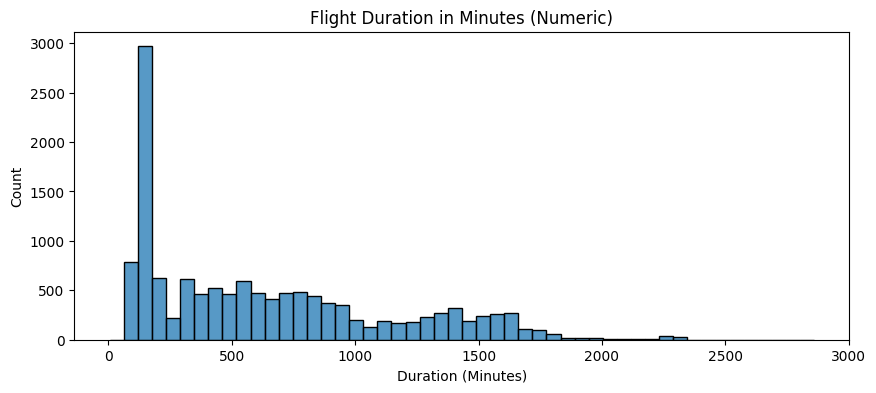

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(df['Duration_minutes'], bins=50)
plt.title("Flight Duration in Minutes (Numeric)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


Plot for Total Stops Distribution after Encoding

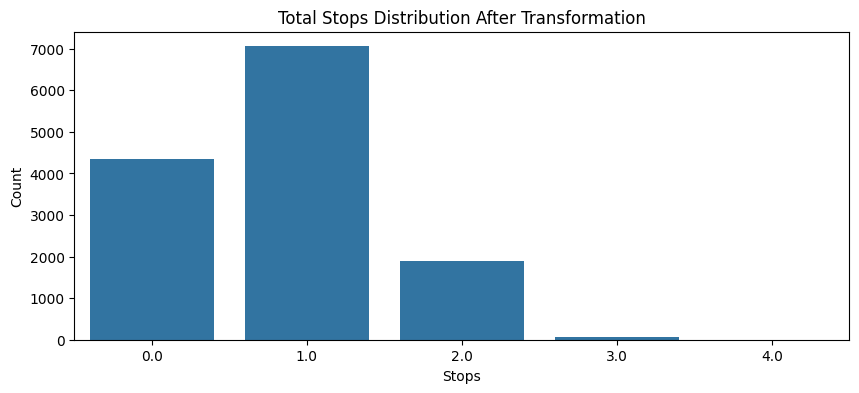

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='Total_Stops', data=df)
plt.title("Total Stops Distribution After Transformation")
plt.xlabel("Stops")
plt.ylabel("Count")
plt.show()


In [39]:

import pandas as pd
price_bins = [0, 6000, 12000, float('inf')]
price_labels = ['Low', 'Medium', 'High']
y_class = pd.cut(y, bins=price_bins, labels=price_labels, right=False)

print("Target variable converted to classes:")
print(y_class.value_counts())
print("")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_class, y_val_class = train_test_split(
    X_train_df, y_class, test_size=0.2, random_state=42, stratify=y_class 
)

knn_classifier = KNeighborsClassifier(n_neighbors=5) # We'll start with K=5
knn_classifier.fit(X_train, y_train_class)

print("KNN Classifier model trained successfully!")

Target variable converted to classes:
Price
Medium    4620
Low       3167
High      2896
Name: count, dtype: int64

KNN Classifier model trained successfully!


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the VALIDATION set (X_val), not the training set
y_pred_val = knn_classifier.predict(X_val)

print("--- Accuracy Score ---")
print(f"Accuracy: {accuracy_score(y_val_class, y_pred_val):.2f}")

#Confusion Matrix: Shows correct vs. incorrect predictions for each class
print("--- Confusion Matrix ---")
print(confusion_matrix(y_val_class, y_pred_val))
print("")

#Classification Report: Provides precision, recall, and F1-score
print("--- Classification Report ---")
print(classification_report(y_val_class, y_pred_val))

--- Accuracy Score ---
Accuracy: 0.86
--- Confusion Matrix ---
[[485   7  87]
 [  2 564  68]
 [ 71  66 787]]

--- Classification Report ---
              precision    recall  f1-score   support

        High       0.87      0.84      0.85       579
         Low       0.89      0.89      0.89       634
      Medium       0.84      0.85      0.84       924

    accuracy                           0.86      2137
   macro avg       0.86      0.86      0.86      2137
weighted avg       0.86      0.86      0.86      2137



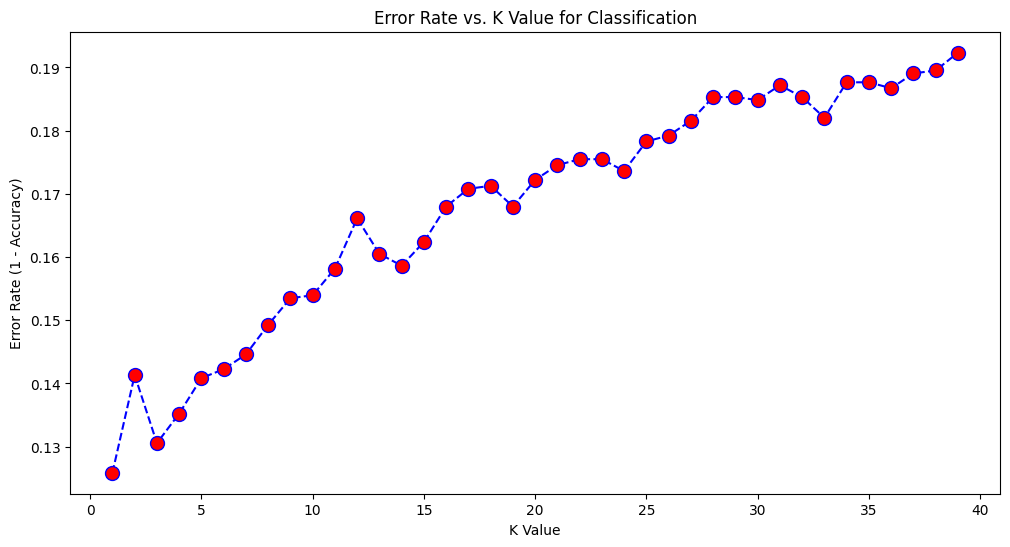

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#We will test K values from 1 to 39
k_range = range(1, 40)
error_rate = []

for i in k_range:
    #Use KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the model using the CORRECT training data and CLASSIFIED labels
    knn.fit(X_train, y_train_class)
    
    # Make predictions on the VALIDATION set
    pred_i = knn.predict(X_val)
    
    # Calculate the error rate (1 - accuracy) on the validation set
    # We compare the predictions (pred_i) with the actual validation labels (y_val_class)
    error_rate.append(1 - accuracy_score(y_val_class, pred_i))

# --- Plotting the error rate ---
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value for Classification')
plt.xlabel('K Value')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.show()